# Tree-based Algorithms:

Tree-based algorithm as the name suggests it is a flow like a tree structure that works on the principle of conditions. It is a non-parametric supervised learning method used for **classification and regression problems**:

- A classification problem tries to classify unknown elements
into a class or category; the outputs are always categorical variables (i.e. yes/no, up/down, red/blue/yellow, etc.)

- A regression problem tries to forecast a number such as the return for the next day

# Decision Trees:

The decision tree looks like a vague upside-down tree with a decision rule at the root, from which subsequent decision rules spread out below. For example, a decision rule can be whether a person exercises. There can also be nodes without any decision rules; these are called leaf nodes.

- Decision trees create a tree-like structure by computing the relationship between independent features and a target. This is done by making use of functions that are based on comparison operators on the independent features."
- A decision tree classification is to predict a categorical output
- A decision tree regression is to predict a numerical output

### Key Terminology:
 
> Branches - Division of the whole tree is called branches.
>
> Root Node - Represent the whole sample that is further divided.
>
> Splitting - Division of nodes is called splitting.
>
> Terminal Node - Node that does not split further is called a terminal node.
>
>Decision Node -  It is a node that also gets further divided into different sub-nodes being a sub node. 
>
> Pruning - Removal of less important subnodes from a decision node.
>
> Parent and Child Node - When a node gets divided further then that node is termed as parent node whereas the divided nodes or the sub-nodes are termed as a child node of the parent node.

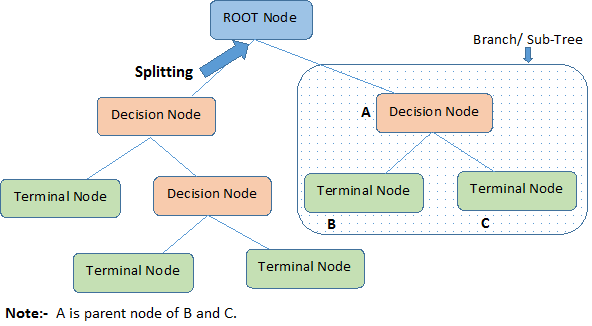

**Goal**: create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

# Assumptions


1. In the beginning, the **whole data is considered as the root**, thereafter, we use the algorithms to make a split or divide the root into subtrees.
2. The **feature values are considered to be categorical**. If the values are continuous, then they are separated prior to building the model.
3. Records are **distributed recursively** on the basis of attribute values.
4. The **ordering of attributes as root** or internal node of the tree is done using a **statistical approach**.

# Techniques for Spliting in Classification Trees

The major challenge in Decision Tree is the identification of the attribute for the root node in each level. This process is known as attribute selection. There are two popular attribute selection measures: 

1. **Gini Index**
2. **Information Gain**
3. Chi-square Method (Categorical Variables Only)

## 1. Gini Index/Impurity
Gini Index is a metric to measure **how often a randomly chosen element would be incorrectly identified**.
 - An attribute with lower Gini index should be preferred.
 - Sklearn supports “Gini” criteria for Gini Index and by default, it takes “gini” value.
 - Index always between 0 and 1, where **0 denotes that all elements belong to a certain class** (or the division is pure), and **1 denotes that the elements are randomly distributed across various classes**
     - A Gini impurity of 0.5 denotes that the elements are distributed equally into some classes.
 - The Formula for the calculation of the of the Gini Index is given below:
 
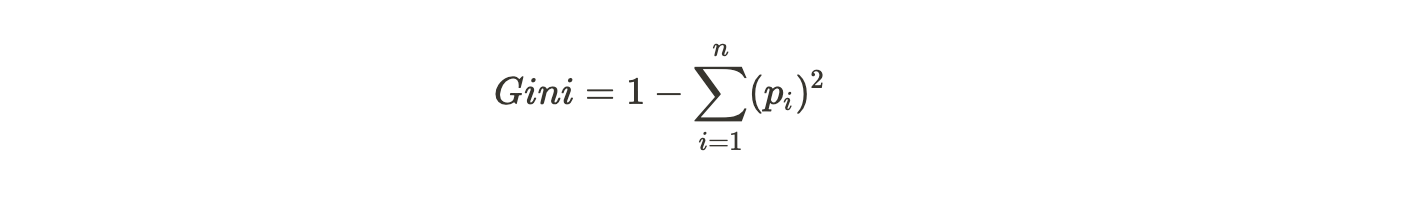 Where $p_i$ is the probability of a particular element belonging to a specific class.

### **Classification example (whether love popcorn):**
> 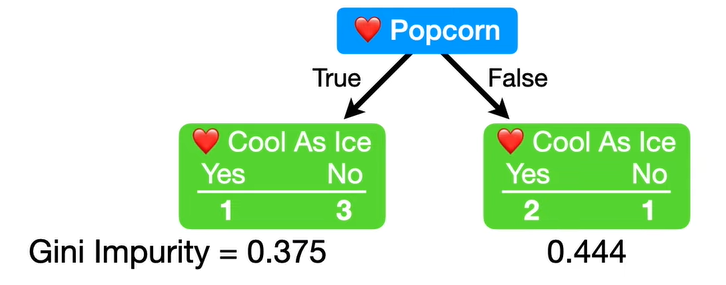
> For the left-handed side, the 'Love Popcorn' for True has a Gini index = $1 - [ (\frac{3}{4})^2 + (\frac{1}{4})^2 ] = 0.375$
>
> For the right-handed side, the 'Love Popcorn' for False has a Gini index = $1 - [ (\frac{1}{3})^2 + (\frac{2}{3})^2 ] = 0.444$
>
> **Total Gini Impurity** = weighted average of Gini Impurities for the leaves = $ (\frac{4}{3+4}) 0.375 + (\frac{3}{3+4}) 0.444 = 0.405$
>
> So Gini impurity for 'Love Popcorn' is 0.405

#### In case of  **Continuous value existed as a features of the classifcation (what is the age range):**
>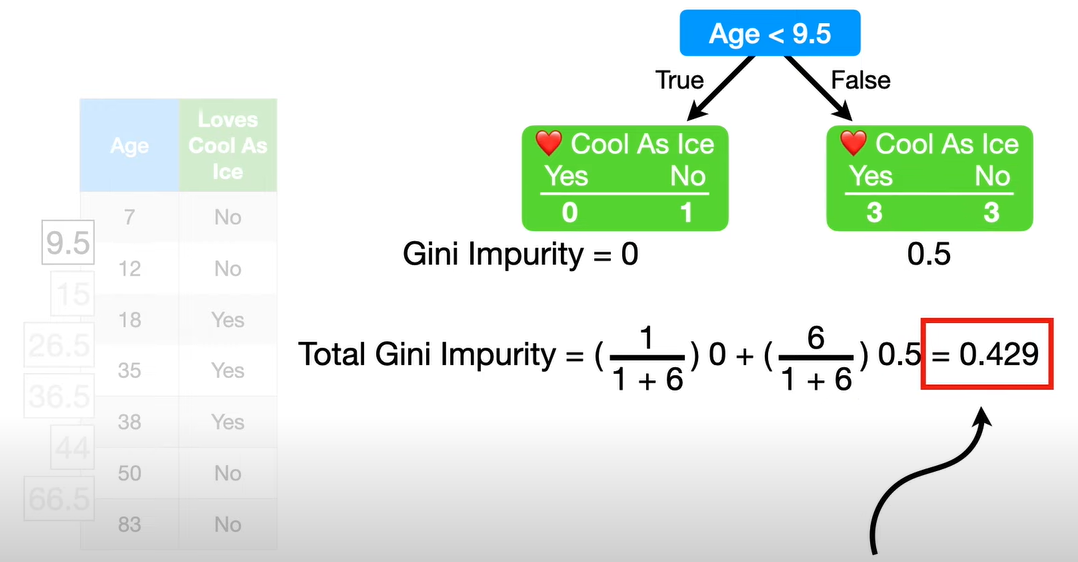
>
>> Steps before spliting:
>>
>> 1. First, sort the age ascendingly 
>> 2. Calcuate the average age for each adjacent value
>> 3. Calcuate the Gini index for each average age, the picture above take 'Age < 9.5' as an example
>
> For the left-handed side, the 'Age < 9.5' for True has a Gini index = $1 - [(\frac{0}{1})^2+(\frac{1}{1})^2] = 0$
>
> For the right-handed side, the 'Age< 9.5' for False has a Gini index = $1 - [(\frac{3}{6})^2+(\frac{3}{6})^2] = 0.5$
>
> Total Gini Impurity = weighted average of Gini Impurities for the leaves =  $(\frac{1}{1+6})0+(\frac{6}{1+6})0.5 = 0.429$
>
> So the total Gini impurity for 'Age < 9.5' is 0.429
>
> Then, perform this step to all other average ages to find the lowest Gini index, for decision on what is the range of age for the initial spliting 

#### Which feature to split first on top of the tree?
To decide what features to be split at the toppest of the tree, it's all about which feature has the **lowest total Gini impurity** on its leaves.

For example, the above two features 'Love Popcorn' and 'Age < 9.5' give total Gini indices of 0.405 and 0.429. **'Love Popcorn' having the lower Gini index should be the spliting node** instead of 'Love Popcorn'.

For further spliting, total Gini impurity is again calculated for each remaining features, the lowest value will become the next spliting criteria, until no more spliting is available.

## 2. Information Gain

Information Gain depicts the amount of information that is gained by an attribute. It is a measure of **decrease in entropy** after the dataset is split. It is all about **finding the best nodes that return the highest information gain** (greatest entropy drop). This is computed using a factor known as **Entropy**. 

- Entropy defines the degree of disorganization in a system, or a measure of uncertainty of a random variable. The more the disorganization or the more the information content is, the more is the entropy.

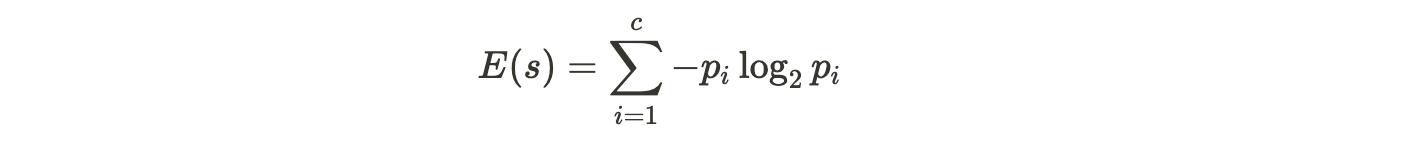 Where $p_i$ is the probability of a particular element belonging to a specific class.

For example:
> Taking the classification example above in Gini index,
>
> Entropy H(X) at the left-handed side with 'Love Popcorn' is True:
>   = $- [ (\frac{1}{4}) log_{2} \frac{1}{4} + (\frac{3}{4}) log_{2} \frac{3}{4} ] = 0.8113$
>
> Entropy H(X) at the right-handed side with 'Love Popcorn' is False:
>   = $- [ (\frac{2}{3}) log_{2} \frac{2}{3} + (\frac{1}{3}) log_{2} \frac{1}{3} ] = 0.9183$
> 
> Total entropy = $\frac{4}{3+4} 0.8113 + \frac{3}{3+4} 0.9183 = 0.8571$

> And the continuous value example too,
>
> Entropy H(X) at the left-handed side with 'Age < 9.5' is True:
>   = $- [ (\frac{0}{1}) log_{2} \frac{0}{1} + (\frac{1}{1}) log_{2} \frac{1}{1} ] = 0$ (even though $log_2{0}$ = undefined)
>
> Entropy H(X) at the right-handed side with 'Age < 9.5' is False:
>   = $- [ (\frac{3}{6}) log_{2} \frac{3}{6} + (\frac{3}{6}) log_{2} \frac{3}{6} ] = 1$
> 
> Total entropy = $\frac{1}{6+1} 0 + \frac{6}{6+1} 1 = 0.8571$

## 3. Chi-square method (Categorical Variables Only)
This evaluation works well when if the target variables are categorical like success-failure/high-low. The core idea of the algorithm is to find the **statistical significance of the variations** that exist between the sub-nodes and the parent node.
> Mathematical expression: chi-square = $\sqrt{\frac{(Actual - Expexted)^2}{Expected}}$ 

   - There should be **expexted values** for each variables before using this method
   - The formula represents the sum of squares of standardized differences between the observed and the expected frequencies of the target variable.
   - One other main advantage of using chi-square is, it can perform multiple splits at a single node which results in more accuracy and precision.
   - The tree will **split on the variable with higher chi-square value**

### Comparing the Splitting Methods

The **Gini Impurity favours bigger partitions** (distributions) and is simple to implement with smaller computing power, whereas **information gains favour smaller partitions** (distributions) with a variety of diverse values, necessitating a data and splitting criterion experiment.

When working with categorical data variables, the **Gini Impurity** returns either “success” or “failure” and **solely does binary splitting**; in contrast, **information gain** evaluates the entropy differences before and after splitting and **illustrates impurity in class variables**.

**Chi-square** aids in determining the statistical significance of differences between sub-nodes and the parent node. It is calcualted as the sum of the squares of the standardized discrepancies between the observed and expected frequencies of the target variable. It can do numerous splits at a single node, resulting in greater precision and accuracy. It also just like Gini impurity **works only with categorical variables**

# Techniques for Spliting in Regression Trees

There are some popular attribute selection measures:
1. Sum of Squared Residual (SSR)
 > 1.1 friedman_mse
 
2. Absolute squared error (MAE)

3. Poisson deviance

In the following, only the MSE and Poisson will be discussed as the calculation of MSE and MAE are quite similar.

## 1. Sum of Squared Residual (SSR)
It is the sum of the **squared difference of the actual and expected values** (the expected value is the mean of the values falling within the range).

 - The bottom figure shows the calculation of the expected value, which the mean of the values falling within the range.
 > 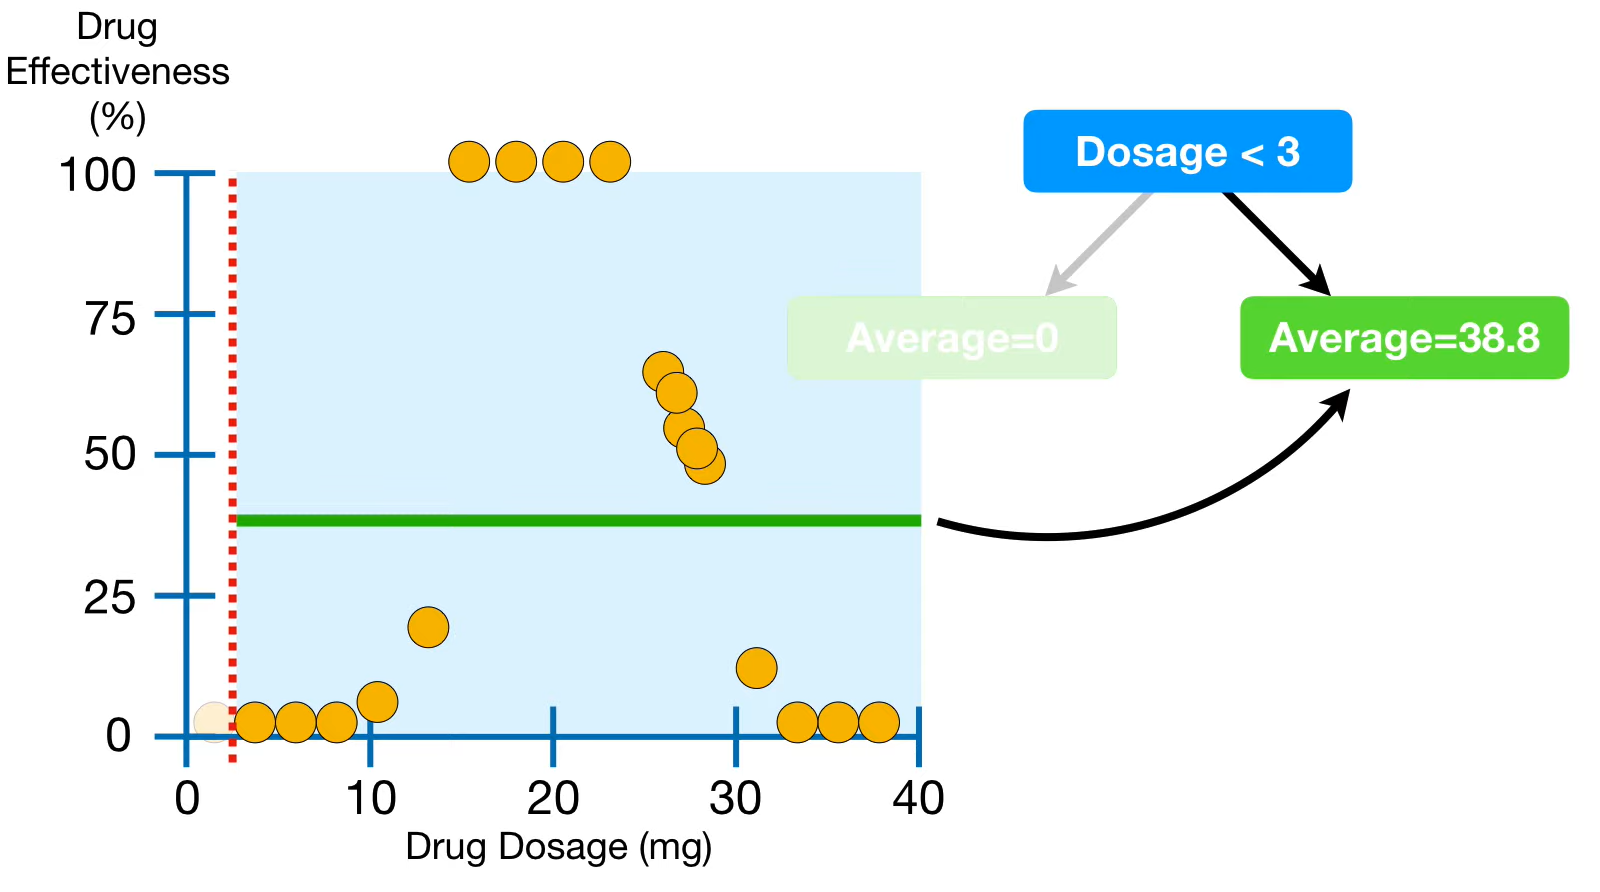

 - The bottom figure shows the calculation of the SSR.
 > 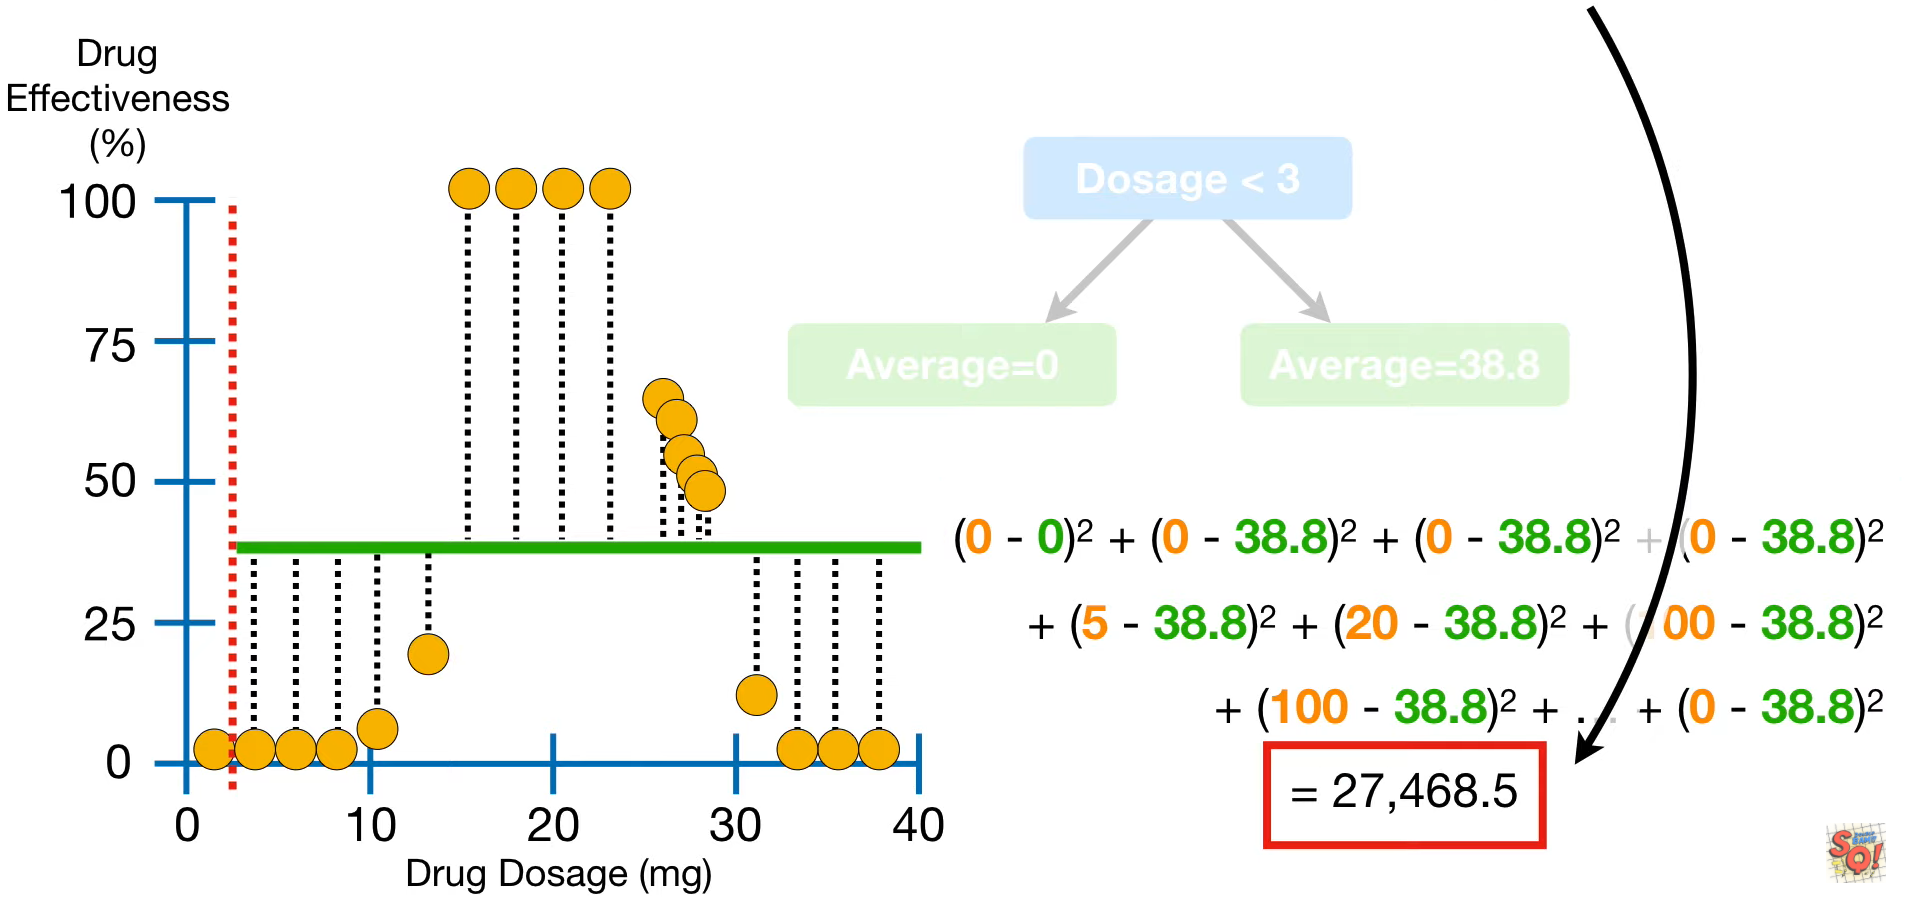

#### Which feature to split first on top of the tree?
For a **single variable**, after calculating the SSR for each potential node, the node with the lowest SSR will become the splitting criteria. This step is repeated until no more splitting is available.

For more than one features, after calculating the SSR for each features, the one with the lowest SSR will become the splitting criteria. This step is repeated until no more splitting is available. 

However, it is noted the splitting continues until it is not available. It leads to **overfitting with such a no bias model**. The next part will include the solution for this problem.

   ### friedman_mse
   > MSE with Friedman’s improvement score for potential splits
   
## 2. Sum of Absolute Residual (SAR)
It is simply the sum of the **absolute difference of the actual and expected values** (the expected value is the median of the values falling within the range).

- The benefit is that it is not as sensitive to outliers and provides a more robust model
- The drawback is in insensitivity when dealing with data sets containing a large proportion of zeros

## 3. Poisson deviance
The Poisson distribution is a probability distribution often used for modeling **count data with only positive integer values**. For example, the model is to predict “events”, like the number of customers that walk into a store, or birds that land in a tree in a given hour.

- In a Poisson distribution, the **mean is equal to the variance**, but in real life, the variance is often greater (over-dispersed) or less than the mean (under-dispersed).
- When the mean of a Poisson is over 10, and especially over 20, it can be approximated with a Gaussian

> Equation for the Poisson deviance: **(Need further review!! What's if mu = 0???)**
> 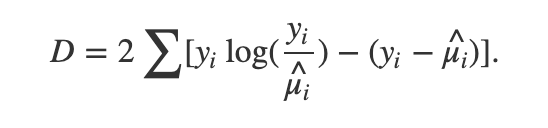, where $y_i$ is the actual value, and the $u_i$ is the model’s prediction.
>
> Obviously, if $y_i = mu_i$, then $ln(1) = 0$, canceling out the first term, and the second as well, giving a deviance of 0.


# When to stop spilting for Large Datasets
For classification trees, a problem with large set of features and thus large number of split can create a huge and complex tree. Regression tree also continues splitting until no more splitting is available. These trees can lead to **overfitting**. Therefore, it is necessary to know when to stop.

  1. **Set a minimum number of training inputs to use on each leaf**
   - for example, using  minimum of 10 passengers to reach a decision (died/survived), ignore any branch that takes less than 10 passengers, splitting is terminated and it will become a leaf immediately.

  
  2. **Set maximum depth of the model**
   - Maximum depth refers to the length of the longest path from a root to a leaf.

# Result Evaluation

**Accuracy score** and **confusion matrix** can also help to calculate the accuracy of the trained model and understand the trained model behavior over the test dataset or validation dataset.

For an accuracy score, 
 - computed by comparing actual values and predicted values.
 
For a confusion matrix, 
 - precision - how precise the predictions are = TP/(TP+FP), TN/(TN+FN)
 - recall - how complete the predictions are = TP/(TP+FN), TN/(TN+FP)
 - f1 score - harmonic mean = 2*precision*recall / (precision+recall)

# Advantages & Disadvantages 

### Advantages
1. Require relatively **little effort from users for data preparation**, e.g. dealing with the missing values, normalization, transformation, and scaling the data

2. Able to take care of **numeric as well as categorical features**.

3. **Non-linear parameters** do not affect its performance

4. Decision trees implicitly perform variable screening or feature selection, thus **intuitive and easy to explain the model and result**, and one can make prediction based on a trained Decision tree model

5. Results that are generated from the Decision tree algorithm **does not require any statistical or mathematics knowledge to be explained**


### Disadvantages
1. The model can be **unstable and have high variance** if there are small changes in training data.

2. **Overfitting** occurs when the algorithm captures noises in the data

3. A highly complicated tree tend to have a **low bias** which make it difficult for the model to work with new data.

4. The **training time drastically increases, proportional to the size of the datase**

# Prevent Overfitting through Regularization
There is no belief that is assumed by the decision tree that is an association between the independent and dependent variables. Decision tree is a distribution-free algorithm. If decision trees are left unrestricted they can generate tree structures that are adapted to the training data which will result in **overfitting**. 

To avoid these things, we need to restrict it during the generation of trees that are called **Regularization**. The parameters of regularization are dependent on the DT algorithm used.

### Some of the regularization parameters
 
- **Max_depth**: It is the maximal length of a path that is from root to leaf. Leaf nodes are not split further because they can create a tree with leaf nodes that takes many inspections on one side of the tree whereas nodes that contain very less inspection get again split. (default: None)

- **Min_sample_spilt**: It is the limit that is imposed to stop the further splitting of nodes. (Default: 2)

- **Min_sample_leaf**: A minimum number of samples that a leaf node has. If leaf nodes have only a few findings it can then result in overfitting. (Default: 1)

- **Max_leaf_node**: It is defined as the maximum number of leaf nodes in a tree (Default: None)

- **Max_feature**:  It is computed as the maximum number of features that are examined for the splitting for each node. (Default: None)

- **Min_weight_fraction_leaf**: It is similar to min_sample_leaf that is calculated in the fraction of total no weighted instances. (Default: 0)

# Other Useful Hyperparameters
After instantiating the decistion tree model, despite the above regularization parameters, the following useful hyperparameters can also be tuned on testing the model:

- **criterion**: measure the quality of the split. 
  - For classification tree, the default value is “Gini”. If to calculate the measure by entropy gain, change this parameter to “entropy”.
  - For regression tree, the default value is ”squared_error”, other options are “friedman_mse”, “absolute_error”, “poisson”
  
- **splitter**: choose the split at each node. 
 - If want the sub-trees to have the best split, set this parameter to “best”. A random split is also available for which the value “random” is set.

# Evolutionary Decision Trees
Sometimes, different models are combined together to create an ensemble algorithm. There are two types of ensemble methods, mainly:
1. Parallel Ensemble Methods or Averaging Methods

Several models are created
by one algorithm and the forecast is the average of the overall models.
Some examples include:
 - Bagging
 - Random Subspace
 -  Random Forest

2. Sequential Ensemble Methods or Boosting Methods
The algorithm creates sequential models refining on each new model to
reduce the bias of the previous one. The examples include
 - AdaBoosting
 - Gradient Boosting